In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir  
from os.path import join

In [44]:
def show(i):                
    cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
    cv2.imshow('Image',i)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
path='asl_letters'

In [88]:
imgs=[]
labels=[]

In [89]:
for l in listdir(path):
    letter=join(path, l)
    for i in listdir(letter):
        img_path=join(letter,i)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(50,50),interpolation=cv2.INTER_CUBIC)
        imgs.append(img)
        labels.append(l)
        

In [17]:
ccc=cv2.imread(iii)

In [99]:
len(imgs)

1815

In [91]:
a=np.array(imgs,dtype=np.uint8)

In [100]:
a.shape

(1815, 50, 50, 3)

In [59]:
cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
cv2.imshow('Image',ccc)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [67]:
show(cv2.resize(ccc,(50,50),interpolation=cv2.INTER_LINEAR))

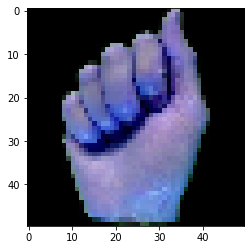

In [71]:
fig,ax=
plt.imshow(cv2.resize(ccc,(50,50),interpolation=cv2.INTER_LINEAR))

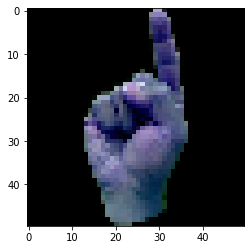

In [103]:
plt.imshow(a[-1])

In [ ]:
#importing images path
images_path = [join(path, f) for f in listdir(path)]

#making target column 
target = [f.split('_')[0] for f in listdir(path)] 

In [3]:
train=pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
test=pd.read_csv('sign_mnist_test/sign_mnist_test.csv')

In [4]:
sample=train.iloc[0]

sample=sample[1:]

sample=sample.values

sample=sample.reshape((28,28))

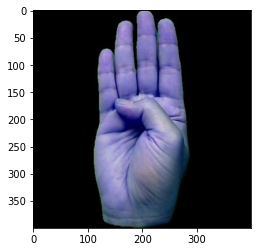

In [58]:
plt.imshow(imgs[100])

In [12]:
s=sample.flatten()

In [14]:
s.shape

(784,)

In [24]:
res=model.predict(s.reshape(-1,28,28,1))

In [25]:
classes[list(np.where(res==1))[0][0]]

'A'

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [104]:
a.shape

(1815, 50, 50, 3)

In [105]:
x = a.copy()
y = labels

In [107]:
#Normalizing 
x= x/255

In [109]:
x.shape

(1815, 50, 50, 3)

In [111]:
len(y)

1815

In [6]:
X_train = train.drop(["label"],axis=1)
X_test = test.drop(["label"],axis=1)
Y_train = train['label']
Y_test = test['label']
del train['label']
del test['label']

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0
X_train.shape
X_test.shape


(7172, 784)

In [8]:
X_test.shape[0]

7172

In [9]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape
X_test.shape

(7172, 28, 28, 1)

In [114]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()

In [115]:
y = label_binrizer.fit_transform(y)

In [119]:
y[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [120]:
y.shape

(1815, 26)

In [ ]:
Y_train = label_binrizer.fit_transform(Y_train)

In [11]:
Y_train[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_test.shape)

x_train shape (1452, 50, 50, 3)
x_test shape (363, 50, 50, 3)
y_train shape (1452, 26)
y_test shape (363, 26)


In [124]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

from keras.callbacks import ReduceLROnPlateau

In [17]:
a=tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu',padding = 'same', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
    
                        tf.keras.layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
    
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.Flatten(),
    
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(24, activation='softmax')])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 512)         590336    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 512)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 512)        

In [125]:
#Using
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu',padding = 'same', input_shape=(50, 50, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
    
                        tf.keras.layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
    
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.Flatten(),
    
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(26, activation='softmax')])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 512)       590336    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 512)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 512)         2

In [126]:
#optimizer = Adam(lr=0.003, beta_1=0.9, beta_2=0.999)

model.compile( optimizer='rmsprop' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [127]:
epochs = 45 
batch_size = 200

In [128]:
from keras.preprocessing.image import ImageDataGenerator

In [129]:
#Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=15, 
        zoom_range = 0.5,
        width_shift_range=0.15,  
        height_shift_range=0.15, 
        horizontal_flip=True,  
        vertical_flip=False)  

datagen.fit(X_train)

In [130]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_test,Y_test), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/45
7/7 [==============================] - 49s 3s/step - loss: 6.7702 - accuracy: 0.0351 - val_loss: 3.2447 - val_accuracy: 0.0275
Epoch 2/45
7/7 [==============================] - 24s 3s/step - loss: 3.1796 - accuracy: 0.0759 - val_loss: 2.7668 - val_accuracy: 0.1322
Epoch 3/45
7/7 [==============================] - 24s 3s/step - loss: 3.0946 - accuracy: 0.0855 - val_loss: 2.7881 - val_accuracy: 0.1488
Epoch 4/45
7/7 [==============================] - 15s 2s/step - loss: 2.8126 - accuracy: 0.1186 - val_loss: 2.2256 - val_accuracy: 0.2975
Epoch 5/45
7/7 [==============================] - 22s 3s/step - loss: 2.7280 - accuracy: 0.1494 - val_loss: 2.3766 - val_accuracy: 0.1873
Epoch 6/45
7/7 [==============================] - 25s 3s/step - loss: 2.7610 - accuracy: 0.1669 - val_loss: 2.2381 - val_accuracy: 0.2176
Epoch 7/45
7/7 [==============================] - 25s 2s/step - loss: 2.6847 - accuracy: 0.1861 - val_loss: 2.4308 - val_accuracy: 0.3003
Epoch 8/45
7/7 [==================

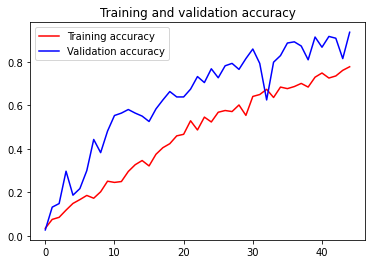

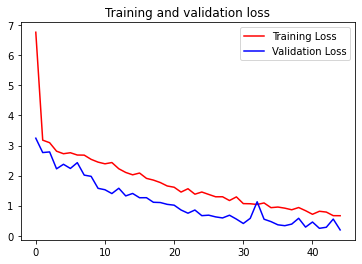

In [131]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [167]:
#Saving the model
model.save('asl_model1.h5')

#### Checking performance using the test data

In [19]:
y_testt=label_binrizer.fit_transform(Y_test)

In [37]:
y_pred=model.predict(X_test)

In [42]:
y_pred=y_pred.round()

In [48]:
y_testt.shape

(7172, 24)

In [49]:
y_pred.shape

(7172, 24)

In [50]:
from sklearn.metrics import accuracy_score

accuracy_score(y_testt,y_pred)

0.9997211377579476

In [132]:
classes={}
for i,j in enumerate('ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    classes[i]=j

In [21]:
y_testt[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [25]:
list(np.where(y_testt[1]==1)[0])[0]

5

In [29]:
classes[list(np.where(y_testt[10]==1))[0][0]]

'I'

In [17]:
import cv2

In [16]:
sample.shape

(28, 28)

In [ ]:
#p=X_test[0]
cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
cv2.imshow('Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
test_img=cv2.resize(sample,(28,28))
#model.predict(img)

In [161]:
test_img=cv2.imread('test11.jpg')
print(test_img.shape)
test_img=cv2.resize(test_img,(50,50),interpolation=cv2.INTER_CUBIC)

(350, 350, 3)


In [162]:
test_img.shape

(50, 50, 3)

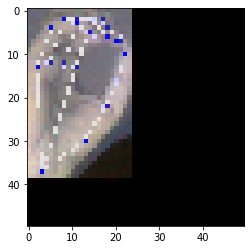

In [163]:
plt.imshow(test_img)

In [164]:
test_ans=model.predict(test_img.reshape(-1,50,50,3),verbose=0)

In [165]:
test_ans

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [166]:
classes[np.where(test_ans==1)[1][0]]

'B'

In [92]:
model.predict(tttt,1,verbose=0)

ValueError: in user code:

    c:\users\hp 15\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    c:\users\hp 15\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\hp 15\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\hp 15\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\hp 15\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\hp 15\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    c:\users\hp 15\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    c:\users\hp 15\appdata\local\programs\python\python39\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\users\hp 15\appdata\local\programs\python\python39\lib\site-packages\keras\engine\input_spec.py:229 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (None, 28)


In [89]:
classes[5]

'F'

In [104]:
cap.release()    
cv2.destroyAllWindows()

In [6]:
model = tf.keras.models.load_model('Sign_Language_mnist.h5')

In [105]:
cap=cv2.VideoCapture(0)

while True:
    
    ret,frame=cap.read()
    
    f=frame[100:400,320:620]
    cv2.imshow('Image',f)
    
    f=cv2.cvtColor(f,cv2.COLOR_BGR2GRAY)
    f=cv2.resize(f,(28,28),interpolation=cv2.INTER_AREA)
    
    cv2.imshow('Image',f)
    
    c=frame.copy()
    cv2.rectangle(c,(320,100),(620,400),(255,0,0),5)
    
    f=f.reshape(1,28,28,1)
    #result=str(model.predict(f,1,verbose=0)[0])
    
    #cv2.putText(copy,classes[np.where(pp==1)[1][0]],(300,100),cv2.FONT_HERSHEY_COMPLEX,2,(0,255,0),2)
    
    cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
    #cv2.imshow('Image',c)
    
    if cv2.waitKey(1) == ord('a'):
        break

cap.release()    
cv2.destroyAllWindows()

In [ ]:
class Detector:
    def __init__(self):
        pass
    
    def readClass(self,classes_dict):
        self.classesList=list(classes_dict.values())
        self.colorList=np.random.uniform(low=0,high=255,size=(len(self.classesList),3))
        
    
    def load_model(self):
        tf.keras.backend.clear_session()
        self.model=tf.saved_model.load(os.path.join(self.cacheDir,'checkpoints',self.modelName,'saved_model'))
        print('model loaded')
        
        
    def predict(self,image,threshold=0.55):
        
        inputTensor=cv2.cvtColor(image.copy(),cv2.COLOR_BGR2GRAY)
        inputTensor=tf.convert_to_tensor(inputTensor, dtype=tf.uint8)
        inputTensor= inputTensor[tf.newaxis,...]
        detections=self.model(inputTensor)

        bboxes=detections['detection_boxes'][0].numpy()
        classIndexes=detections['detection_classes'][0].numpy().astype(np.int32)
        classScores=detections['detection_scores'][0].numpy()

        h,w,ch=image.shape
        
        bboxIdx= tf.image.non_max_suppression(bboxes, classScores, max_output_size=50, iou_threshold=0.5, score_threshold=threshold)

        if len(bboxIdx)!=0:
            for i in bboxIdx:
                bbox=tuple(bboxes[i].tolist())
                classConf= round(100*classScores[i])
                classIndex= classIndexes[i]

                classLabelText= self.classesList[classIndex]
                classcolor= self.colorList[classIndex]
                
                displayText=f'{classLabelText}: {classConf}'
                ymin, xmin, ymax, xmax= bbox
                ymin, xmin, ymax, xmax= int(ymin*h), int(xmin*w), int(ymax*h), int(xmax*w)
                cv2.rectangle(image,(xmin,ymin),(xmax,ymax),color=classcolor,thickness=1)
                cv2.putText(image,displayText,(xmin,ymin-5),cv2.FONT_HERSHEY_PLAIN,1,classcolor,2)
                
                linewidth=min(int((xmax-xmin)*0.1),int((ymax-ymin)*0.1))
                cv2.line(image,(xmin, ymin),(xmin+linewidth,ymin),classcolor,thickness=4)
                cv2.line(image,(xmin, ymax),(xmin+linewidth,ymax),classcolor,thickness=4)
                cv2.line(image,(xmin, ymin),(xmin, ymin+linewidth),classcolor,thickness=4)
                cv2.line(image,(xmin, ymax),(xmin, ymax+linewidth),classcolor,thickness=4)
                
                cv2.line(image,(xmax-linewidth, ymin),(xmax,ymin),classcolor,thickness=4)
                cv2.line(image,(xmax-linewidth, ymax),(xmax,ymax),classcolor,thickness=4)
                cv2.line(image,(xmax, ymin),(xmax, ymin+linewidth),classcolor,thickness=4)
                cv2.line(image,(xmax, ymax),(xmax, ymax+linewidth),classcolor,thickness=4)
                
                
                
        return image
    
    def predict_img(self,imagePath):
        img=cv2.imread(imagePath)
        
        img=self.predict(img)
        
        cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
        cv2.imshow('Image',img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    
